## Create a  PowerOps Client

A power ops client is a layer on top the regular CogniteClient that contains domain specific interface against CDF and
the powerops data models

To setup the client we keep the credentials in either one or two `toml` files:
### Interactive Login
This only requires one `toml` file looking like this

`settings.toml`

```toml
[cognite]
  login_flow = "interactive"
  project = "<cdf-project>"
  tenant_id = "<tenant-id>"
  cdf_cluster = "<cdf-cluster>"
  client_id = "<client-id>"

[powerops]
  read_dataset = "uc:000:powerops"
  write_dataset = "uc:000:powerops"
  cogshop_version = ""
```

### Client Credentials Login

For this case the you can use two toml files to separate the secrtes from the regular settings

`settings.toml`

```toml
[cognite]
  login_flow = "client_credentials"
  project = "<cdf-project>"
  tenant_id = "<tenant-id>"
  cdf_cluster = "<cdf-cluster>"
  client_id = "<client-id>"

[powerops]
  read_dataset = "uc:000:powerops"
  write_dataset = "uc:000:powerops"
  cogshop_version = ""
```
and the `.secrets.toml`

```toml
[cognite]
  client_secret = "<client-secret>"

```

In [1]:
from cognite.powerops.clients.powerops_client import PowerOpsClient,get_powerops_client
from cognite.client import CogniteClient
import os
os.environ["SETTINGS_FILES"] = "../../settings.toml;../../.secrets.toml"  # settings files are not in current dir

power: PowerOpsClient = get_powerops_client()
# The regular cognite client is available under the .cdf attribute.
client: CogniteClient = power.cdf

## Using the SHOP Interface
We can access the shop interface under the `.shop` attribute

In [2]:
power.shop

In [3]:
shop_runs = power.shop.runs.list(limit=5)

In [15]:
shop_runs

[<ShopRun status="Status.SUCCEEDED" event_external_id="POWEROPS_SHOP_RUN_1662548743204">,
 <ShopRun status="Status.SUCCEEDED" event_external_id="POWEROPS_SHOP_RUN_1662548743052">,
 <ShopRun status="Status.SUCCEEDED" event_external_id="POWEROPS_SHOP_RUN_1662550317276">,
 <ShopRun status="Status.SUCCEEDED" event_external_id="POWEROPS_SHOP_RUN_1662550317441">,
 <ShopRun status="Status.SUCCEEDED" event_external_id="POWEROPS_SHOP_RUN_1662550886167">]

In [16]:
# For reproducability
run_a = power.shop.runs.retrieve("POWEROPS_SHOP_RUN_1662548743204")
run_b = power.shop.runs.retrieve("POWEROPS_SHOP_RUN_1662548743052")

In [37]:
result_a = run_b.get_results()
result_b = run_a.get_results()

In [38]:
result_a, result_b

(<ShopRunResult status=Status.SUCCEEDED>,
 <ShopRunResult status=Status.SUCCEEDED>)

## The Objective Function and Penalty Breakdown

In [20]:
# OBJECTIVE
objective = result_a.objective_function
print(f"objective_function: {objective.}")

# print(objective.data)
# print(objective.data_as_str())
# print(objective.watercourse)
# print(objective.penalty_breakdown)
print(objective.penalty_breakdown_as_str())


objective_function: <OBJECTIVE sequence_external_id=SHOP_Fornebu_OBJECTIVE_736fee6b-7894-4abd-b1e9-86b4f6699ab8>
Sum penalties: None |Major penalties: None |Minor penalties: None



## Plotting time series of shop runs

In [26]:
post_run_a = result_a.post_run
post_run_a.name

'post-run-736fee6b-7894-4abd-b1e9-86b4f6699ab8.yaml'

In [32]:
# We can, for example, write the output file to disk
from pathlib import Path
Path(post_run_a.name).write_text(post_run_a.file_content)

1175735

In [29]:
# Inspect it
from pprint import pprint
pprint(post_run_a.file_content[:1000])

('time:\n'
 '  starttime: 2021-08-02 22:00:00\n'
 '  endtime: 2021-08-15 22:00:00\n'
 '  timeunit: minute\n'
 '  timeresolution:\n'
 '    2021-08-02 22:00:00: 60\n'
 '    2021-08-05 22:00:00: 240\n'
 'model:\n'
 '  objective:\n'
 '    average_objective:\n'
 '      solver_status: Optimal solution is available\n'
 '      grand_total: -19629837728.86\n'
 '      total: -19629845889.267\n'
 '      sum_penalties: 8160.4067934862\n'
 '      minor_penalties: 8160.4067934862\n'
 '      rsv_end_value: -19628260565.545\n'
 '      rsv_end_value_relative: -358070111.3763\n'
 '      market_sale_buy: -1586873.7223579\n'
 '      startup_costs: 1550\n'
 '      bypass_cost: 0.00028189072328782\n'
 '      gate_spill_cost: 8160.4065115954\n'
 '      physical_spill_cost: 7896.5968647988\n'
 '      physical_spill_volume: 0.15793193826884\n'
 '      nonphysical_spill_cost: 263.80964679666\n'
 '      nonphysical_spill_volume: 0.0052761929549406\n'
 '    scen_1:\n'
 '      solver_status: Optimal solution is av

In [39]:
# Or load it
from yaml import safe_load
shop_output = safe_load(post_run_a.file_content)

In [41]:
list(shop_output["model"])

['objective',
 'global_settings',
 'creek_intake',
 'gate',
 'generator',
 'junction',
 'market',
 'plant',
 'production_group',
 'reservoir',
 'cut_group']

In [42]:
list(shop_output["model"]["generator"])

['Dalby_G1',
 'Dalby_G2',
 'Holen_G1',
 'Landet_G1',
 'Lien_krv_G1',
 'Lund_G1',
 'Rull1_G1',
 'Rull1_G2',
 'Rull2_G1',
 'Rull2_G2',
 'Scott_G1',
 'Strand_krv_G1']

In [43]:
list(shop_output["model"]["plant"])

['Dalby',
 'Holen',
 'Landet',
 'Lien_krv',
 'Lund',
 'Rull1',
 'Rull2',
 'Scott',
 'Strand_krv']

['model.generator.Dalby_G1.production', 'model.generator.Dalby_G2.production', 'model.plant.Dalby.production', 'model.plant.Lund.production']


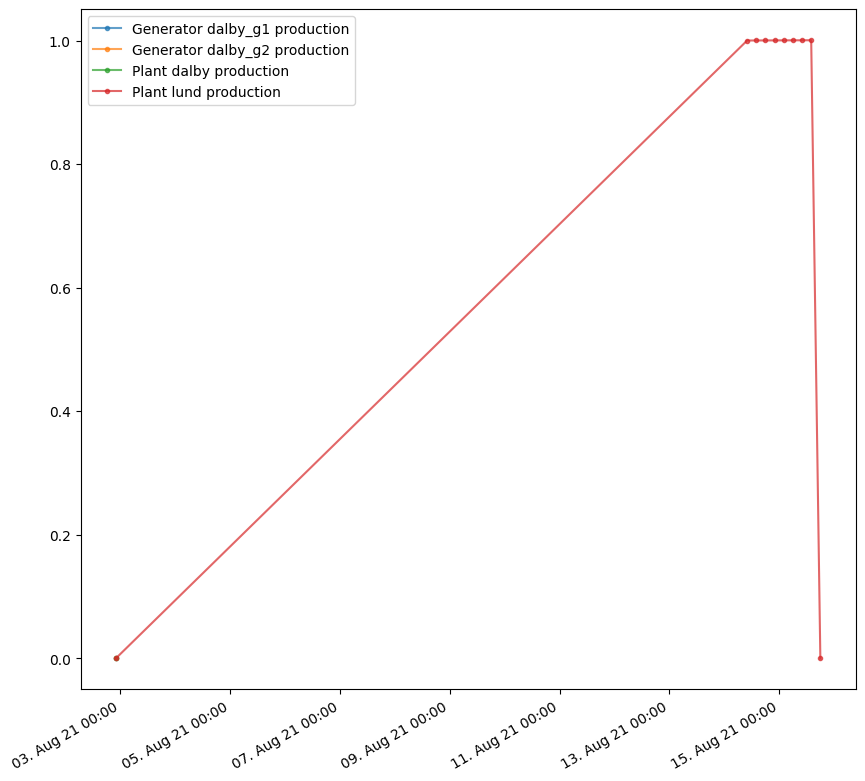

In [36]:
found_keys = post_run_a.find_time_series(
    matches_object_types=["generator", "plant"],
    matches_object_names=["Dalby_G1", "Dalby_G2", "Dalby", "Lund"],
    matches_attribute_names=["production"],
)
print(found_keys)
post_run_a.plot(found_keys)

## Comparing Shop Run Results

In [45]:
post_run_b = result_b.post_run

In [48]:
from IPython.display import Markdown

deep_diff_md = power.shop.results.compare.yaml_difference_md(post_run_a, post_run_b)

Markdown(deep_diff_md)

# Changes from Result A to Result B


## Items in Result B which are not in Result A:
#### Time series:  
Use `post_run.plot(key)` on Result B with one of the following keys 
 - `model.junction.Golebiowski_intake.incr_cost`
 - `model.generator.Lien_krv_G1.committed_out`
 - `model.junction.Lont_intake.incr_cost`
 - `model.generator.Lien_krv_G1.market_income`
 - `model.junction.Sandvika.local_incr_cost`
 - `model.reservoir.Strand_tunnel.head`
 - `model.junction.Landet_intake.local_incr_cost`
 - `model.reservoir.Strand_tunnel.water_value_local_result`
 - `model.generator.Rull2_G2.head_loss`
 - `model.junction.Landet_intake.incr_cost`
 - `model.generator.Rull2_G1.head_loss`
 - `model.junction.Golebiowski_intake.local_incr_cost`
 - `model.plant.Rull2.discharge`
 - `model.reservoir.Hagen.energy_value_local_result`
 - `model.reservoir.Strand.water_value_local_result`
 - `model.generator.Lien_krv_G1.head_loss`
 - `model.generator.Lien_krv_G1.production`
 - `model.junction.Gustad.tunnel_flow_1`
 - `model.junction.Sandvika.incr_cost`
 - `model.generator.Lien_krv_G1.solver_production`
 - `model.reservoir.Strand_tunnel.water_value_global_result`
 - `model.generator.Lien_krv_G1.solver_discharge`
 - `model.junction.Fjerdingby_intake.incr_cost`
 - `model.reservoir.Rullsvatn.head`
 - `model.reservoir.Ranemsletta_1183.water_value_global_result`
 - `model.plant.Lien_krv.production`
 - `model.reservoir.Lensvik.water_value_local_result`
 - `model.junction.w_k_Strand.local_incr_cost`
 - `model.generator.Rull2_G1.solver_discharge`
 - `model.plant.Lien_krv.solver_discharge`
 - `model.reservoir.Rullsvatn.storage`
 - `model.reservoir.Strand.energy_value_local_result`
 - `model.plant.Lien_krv.head_loss`
 - `model.reservoir.Strand_tunnel.energy_value_local_result`
 - `model.generator.Lien_krv_G1.discharge`
 - `model.plant.Rull2.head_loss`
 - `model.junction.Lont_intake.local_incr_cost`
 - `model.gate.w_Rullsvatn_Rullslaagen.discharge`
 - `model.plant.Rull2.prod_unbalance`
 - `model.reservoir.Strand.water_value_global_result`
 - `model.plant.Rull2.solver_discharge`
 - `model.plant.Lien_krv.discharge`
 - `model.junction.Fjerdingby_intake.local_incr_cost`
 - `model.plant.Lien_krv.solver_production`
 - `model.reservoir.Strand_tunnel.storage`
 - `model.reservoir.Lensvik.water_value_global_result`
 - `model.gate.w_Hovden_Livincovs.discharge`
 - `model.generator.Rull2_G1.committed_out`
 - `model.reservoir.Lensvik.energy_value_local_result`
 - `model.junction.w_k_Strand.incr_cost`
 - `model.gate.w_Finnvasstol_Strand_tunnel.discharge`
 - `model.generator.Lien_krv_G1.discharge_fee_objective`
 - `model.generator.Rull2_G1.discharge`
 - `model.reservoir.Hagen.water_value_local_result`
 - `model.plant.Lien_krv.prod_unbalance`
 - `model.junction.Holensfoss_junc.tunnel_flow_1`


## Items in Result A which are not in Result B:
#### Value Items: 
 * `model.reservoir.Frosta.added_to_network`
-1507.6336854143
 * `model.objective.average_objective.nonphysical_spill_cost`
-1507.6336854143
 * `model.objective.average_objective.nonphysical_spill_volume`
-1507.6336854143
 * `model.objective.scen_1.nonphysical_spill_cost`
-1507.6336854143
 * `model.objective.scen_1.nonphysical_spill_volume`
-1507.6336854143

#### Time series:  
Use `post_run.plot(key)` on Result A with one of the following keys 
 - `model.junction.Golebiowski_intake.incr_cost`
 - `model.generator.Lien_krv_G1.committed_out`
 - `model.junction.Lont_intake.incr_cost`
 - `model.generator.Lien_krv_G1.market_income`
 - `model.junction.Sandvika.local_incr_cost`
 - `model.reservoir.Strand_tunnel.head`
 - `model.junction.Landet_intake.local_incr_cost`
 - `model.reservoir.Strand_tunnel.water_value_local_result`
 - `model.generator.Rull2_G2.head_loss`
 - `model.junction.Landet_intake.incr_cost`
 - `model.generator.Rull2_G1.head_loss`
 - `model.junction.Golebiowski_intake.local_incr_cost`
 - `model.plant.Rull2.discharge`
 - `model.reservoir.Hagen.energy_value_local_result`
 - `model.reservoir.Strand.water_value_local_result`
 - `model.generator.Lien_krv_G1.head_loss`
 - `model.generator.Lien_krv_G1.production`
 - `model.junction.Gustad.tunnel_flow_1`
 - `model.junction.Sandvika.incr_cost`
 - `model.generator.Lien_krv_G1.solver_production`
 - `model.reservoir.Strand_tunnel.water_value_global_result`
 - `model.generator.Lien_krv_G1.solver_discharge`
 - `model.junction.Fjerdingby_intake.incr_cost`
 - `model.reservoir.Rullsvatn.head`
 - `model.reservoir.Ranemsletta_1183.water_value_global_result`
 - `model.plant.Lien_krv.production`
 - `model.reservoir.Lensvik.water_value_local_result`
 - `model.junction.w_k_Strand.local_incr_cost`
 - `model.generator.Rull2_G1.solver_discharge`
 - `model.plant.Lien_krv.solver_discharge`
 - `model.reservoir.Rullsvatn.storage`
 - `model.reservoir.Strand.energy_value_local_result`
 - `model.plant.Lien_krv.head_loss`
 - `model.reservoir.Strand_tunnel.energy_value_local_result`
 - `model.generator.Lien_krv_G1.discharge`
 - `model.plant.Rull2.head_loss`
 - `model.junction.Lont_intake.local_incr_cost`
 - `model.gate.w_Rullsvatn_Rullslaagen.discharge`
 - `model.plant.Rull2.prod_unbalance`
 - `model.reservoir.Strand.water_value_global_result`
 - `model.plant.Rull2.solver_discharge`
 - `model.plant.Lien_krv.discharge`
 - `model.gate.f_Ranemsletta_1183_Livincovs.discharge`
 - `model.junction.Fjerdingby_intake.local_incr_cost`
 - `model.plant.Lien_krv.solver_production`
 - `model.reservoir.Strand_tunnel.storage`
 - `model.reservoir.Lensvik.water_value_global_result`
 - `model.gate.w_Hovden_Livincovs.discharge`
 - `model.generator.Rull2_G1.committed_out`
 - `model.reservoir.Lensvik.energy_value_local_result`
 - `model.junction.w_k_Strand.incr_cost`
 - `model.gate.w_Finnvasstol_Strand_tunnel.discharge`
 - `model.generator.Lien_krv_G1.discharge_fee_objective`
 - `model.generator.Rull2_G1.discharge`
 - `model.reservoir.Hagen.water_value_local_result`
 - `model.plant.Lien_krv.prod_unbalance`
 - `model.junction.Holensfoss_junc.tunnel_flow_1`


## Items that are both in Result A (top) and Result B (bottom) but are different: 
#### Values: 
 - `model.objective.average_objective.grand_total`
    - -19629837728.86
    - -19629879739.444
 - `model.objective.average_objective.total`
    - -19629845889.267
    - -19629887636.041
 - `model.objective.average_objective.sum_penalties`
    - 8160.4067934862
    - 7896.5971466895
 - `model.objective.average_objective.minor_penalties`
    - 8160.4067934862
    - 7896.5971466895
 - `model.objective.average_objective.rsv_end_value`
    - -19628260565.545
    - -19628272615.793
 - `model.objective.average_objective.rsv_end_value_relative`
    - -358070111.3763
    - -358082161.62457
 - `model.objective.average_objective.market_sale_buy`
    - -1586873.7223579
    - -1616570.248269
 - `model.objective.average_objective.gate_spill_cost`
    - 8160.4065115954
    - 7896.5968647988
 - `model.objective.scen_1.grand_total`
    - -19629837728.86
    - -19629879739.444
 - `model.objective.scen_1.total`
    - -19629845889.267
    - -19629887636.041
 - `model.objective.scen_1.sum_penalties`
    - 8160.4067934862
    - 7896.5971466895
 - `model.objective.scen_1.minor_penalties`
    - 8160.4067934862
    - 7896.5971466895
 - `model.objective.scen_1.rsv_end_value`
    - -19628260565.545
    - -19628272615.793
 - `model.objective.scen_1.rsv_end_value_relative`
    - -358070111.3763
    - -358082161.62457
 - `model.objective.scen_1.market_sale_buy`
    - -1586873.7223579
    - -1616570.248269
 - `model.objective.scen_1.gate_spill_cost`
    - 8160.4065115954
    - 7896.5968647988
 - `model.reservoir.Danielsen.added_to_network`
    - 1869107968
    - 32512

#### Time series:
Use `powerops.shop.results.compare.plot_time_series(('Result A', 'Result B'), key)`  on with one of the following keys 
 * `model.reservoir.Sirefelt.energy_value_local_result`
 * `model.reservoir.Strand.head`
 * `model.generator.Lien_krv_G1.committed_out`
 * `model.reservoir.Strand_tunnel.water_value_local_result`
 * `model.reservoir.Tangvall.water_value_local_result`
 * `model.plant.Dalby.gross_head`
 * `model.plant.Rull2.eff_head`
 * `model.reservoir.Livincovs.water_value_local_result`
 * `model.junction.Golebiowski_intake.local_incr_cost`
 * `model.reservoir.Strand.change_in_end_value`
 * `model.reservoir.Sirefelt.water_value_global_result`
 * `model.market.Dayahead.sale_price`
 * `model.junction.Sandvika.incr_cost`
 * `model.junction.Blakstad.local_incr_cost`
 * `model.reservoir.Ranemsletta_1183.water_value_local_result`
 * `model.reservoir.Ranemsletta_1183.storage`
 * `model.junction.Gustad.incr_cost`
 * `model.reservoir.Lensvik.water_value_local_result`
 * `model.junction.Golebiowski_intake.tunnel_flow_1`
 * `model.reservoir.Hovden.water_value_global_result`
 * `model.plant.Lien_krv.eff_head`
 * `model.reservoir.Frosta.water_value_local_result`
 * `model.plant.Lien_krv.head_loss`
 * `model.reservoir.Lundvann.energy_value_local_result`
 * `model.generator.Dalby_G1.eff_head`
 * `model.reservoir.Strand.water_value_global_result`
 * `model.plant.Rull2.gross_head`
 * `model.reservoir.Lensvik.end_value`
 * `model.reservoir.Lensvik.energy_value_local_result`
 * `model.junction.Vigrestad.incr_cost`
 * `model.reservoir.Varhaug.energy_value_local_result`
 * `model.plant.Landet.prod_unbalance`
 * `model.generator.Rull2_G1.discharge`
 * `model.plant.Lien_krv.prod_unbalance`
 * `model.plant.Landet.gross_head`
 * `model.reservoir.Sirefelt.water_value_local_result`
 * `model.reservoir.Strand_tunnel.head`
 * `model.generator.Landet_G1.discharge`
 * `model.reservoir.Sirefelt.head`
 * `model.junction.w_k_Strand.tunnel_flow_1`
 * `model.cut_group.1.end_value`
 * `model.generator.Rull2_G1.head_loss`
 * `model.generator.Landet_G1.head_loss`
 * `model.generator.Lund_G1.market_income`
 * `model.junction.Blakstad.incr_cost`
 * `model.reservoir.Danielsen.water_value_global_result`
 * `model.reservoir.Livincovs.energy_value_local_result`
 * `model.reservoir.Lensvik.storage`
 * `model.generator.Lien_krv_G1.solver_production`
 * `model.reservoir.Strand_tunnel.water_value_global_result`
 * `model.junction.w_k_Strand.tunnel_flow_2`
 * `model.reservoir.Strand_tunnel.end_value`
 * `model.junction.Holensfoss_junc.incr_cost`
 * `model.generator.Holen_G1.eff_head`
 * `model.generator.Landet_G1.production`
 * `model.generator.Lien_krv_G1.eff_head`
 * `model.generator.Landet_G1.market_income`
 * `model.junction.Holensfoss_junc.pressure_height`
 * `model.plant.Lien_krv.gross_head`
 * `model.junction.Fjerdingby_intake.tunnel_flow_1`
 * `model.plant.Rull2.prod_unbalance`
 * `model.gate.w_Rullsvatn_Rullslaagen.discharge`
 * `model.reservoir.Livincovs.head`
 * `model.reservoir.Livincovs.water_value_global_result`
 * `model.reservoir.Lundvann.water_value_local_result`
 * `model.plant.Lien_krv.discharge`
 * `model.reservoir.Frosta.energy_value_local_result`
 * `model.plant.Rull2.production`
 * `model.junction.Gustad.local_incr_cost`
 * `model.generator.Rull2_G2.eff_head`
 * `model.junction.Lont_intake.incr_cost`
 * `model.generator.Lien_krv_G1.market_income`
 * `model.junction.Gustad.pressure_height`
 * `model.reservoir.Nielsen.energy_value_local_result`
 * `model.junction.Landet_intake.local_incr_cost`
 * `model.generator.Rull2_G2.head_loss`
 * `model.junction.Landet_intake.incr_cost`
 * `model.reservoir.Strand.end_value`
 * `model.reservoir.Hovden.water_value_local_result`
 * `model.generator.Rull2_G1.solver_production`
 * `model.reservoir.Hagen.energy_value_local_result`
 * `model.reservoir.Lensvik.head`
 * `model.reservoir.Strand.storage`
 * `model.generator.Lien_krv_G1.solver_discharge`
 * `model.junction.Fjerdingby_intake.incr_cost`
 * `model.generator.Rull2_G1.eff_head`
 * `model.reservoir.Rullsvatn.head`
 * `model.junction.Blakstad.pressure_height`
 * `model.plant.Lien_krv.production`
 * `model.reservoir.Livincovs.change_in_end_value`
 * `model.reservoir.Livincovs.end_value`
 * `model.junction.w_k_Strand.local_incr_cost`
 * `model.generator.Rull2_G1.production`
 * `model.junction.Lont_intake.tunnel_flow_1`
 * `model.generator.Rull2_G1.discharge_fee_objective`
 * `model.junction.Landet_intake.tunnel_flow_1`
 * `model.junction.Landet_intake.pressure_height`
 * `model.reservoir.Rullsvatn.storage`
 * `model.plant.Dalby.eff_head`
 * `model.reservoir.Strand.energy_value_local_result`
 * `model.plant.Rull2.solver_production`
 * `model.junction.Vigrestad.pressure_height`
 * `model.junction.Fjerdingby_intake.local_incr_cost`
 * `model.plant.Landet.eff_head`
 * `model.reservoir.Strand_tunnel.change_in_end_value`
 * `model.reservoir.Danielsen.energy_value_local_result`
 * `model.junction.Golebiowski_intake.pressure_height`
 * `model.reservoir.Tangvall.energy_value_local_result`
 * `model.generator.Lien_krv_G1.discharge_fee_objective`
 * `model.market.Dayahead.buy_price`
 * `model.reservoir.Sirefelt.storage`
 * `model.junction.Holensfoss_junc.tunnel_flow_1`
 * `model.reservoir.Ranemsletta_1183.energy_value_local_result`
 * `model.junction.Golebiowski_intake.incr_cost`
 * `model.generator.Landet_G1.solver_discharge`
 * `model.plant.Landet.discharge`
 * `model.junction.Fjerdingby_intake.pressure_height`
 * `model.generator.Rull2_G1.market_income`
 * `model.plant.Rull2.discharge`
 * `model.junction.Holensfoss_junc.local_incr_cost`
 * `model.reservoir.Strand.water_value_local_result`
 * `model.generator.Lien_krv_G1.head_loss`
 * `model.junction.Vigrestad.local_incr_cost`
 * `model.reservoir.Nielsen.water_value_local_result`
 * `model.generator.Lien_krv_G1.production`
 * `model.reservoir.Danielsen.water_value_local_result`
 * `model.junction.Gustad.tunnel_flow_1`
 * `model.generator.Landet_G1.discharge_fee_objective`
 * `model.market.Dayahead.sale`
 * `model.reservoir.Lensvik.change_in_end_value`
 * `model.junction.Lont_intake.pressure_height`
 * `model.reservoir.Ranemsletta_1183.water_value_global_result`
 * `model.junction.w_k_Strand.pressure_height`
 * `model.plant.Landet.production`
 * `model.generator.Landet_G1.eff_head`
 * `model.generator.Rull2_G1.solver_discharge`
 * `model.plant.Lien_krv.solver_discharge`
 * `model.plant.Holen.gross_head`
 * `model.reservoir.Ranemsletta_1183.head`
 * `model.reservoir.Strand_tunnel.energy_value_local_result`
 * `model.reservoir.Varhaug.water_value_local_result`
 * `model.generator.Lien_krv_G1.discharge`
 * `model.plant.Rull2.head_loss`
 * `model.reservoir.Hovden.energy_value_local_result`
 * `model.junction.Lont_intake.local_incr_cost`
 * `model.generator.Dalby_G2.eff_head`
 * `model.plant.Landet.solver_discharge`
 * `model.plant.Rull2.solver_discharge`
 * `model.reservoir.Livincovs.storage`
 * `model.plant.Lien_krv.solver_production`
 * `model.reservoir.Strand_tunnel.storage`
 * `model.reservoir.Lensvik.water_value_global_result`
 * `model.plant.Landet.head_loss`
 * `model.generator.Rull2_G1.committed_out`
 * `model.junction.w_k_Strand.incr_cost`
 * `model.plant.Holen.eff_head`
 * `model.gate.w_Finnvasstol_Strand_tunnel.discharge`
 * `model.junction.Sandvika.local_incr_cost`
 * `model.reservoir.Hagen.water_value_local_result`
 * `model.junction.Sandvika.pressure_height`

